In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
#from mpltools import color

import sys
sys.path.append("../src")
from numpy_filterbank import * 
%matplotlib inline

In [3]:
hyperparam_vals = np.load("../loss_records/hyperparam_vals_6.npy")
loss_values = np.load("../loss_records/delta_opt_6.npy")
clf_acc = np.load("../loss_records/accuracy_vals6.npy")

images = np.load("../data/processed/train.npy")
simulated = np.load("../data/simulated/pr_train_simulated.npy")

In [4]:
loss_values.shape

(6, 4, 5, 2, 2, 20)

In [7]:
clf_acc.shape

(6, 4, 5, 2, 2)

In [15]:
np.where(clf_acc == np.max(clf_acc[:, :, :, :, 0]))

(array([2]), array([3]), array([4]), array([0]), array([0]))

In [22]:
hyperparam_vals[2][4]

7

In [4]:
loss_values[np.isnan(loss_values)] = 1e4

In [5]:
hyperparam_vals

array([array([0.8 , 0.86, 0.92, 0.98, 1.04, 1.1 ]),
       array([85, 75, 65, 55]), array([3, 4, 5, 6, 7]), 2, list([0, 1]),
       20], dtype=object)

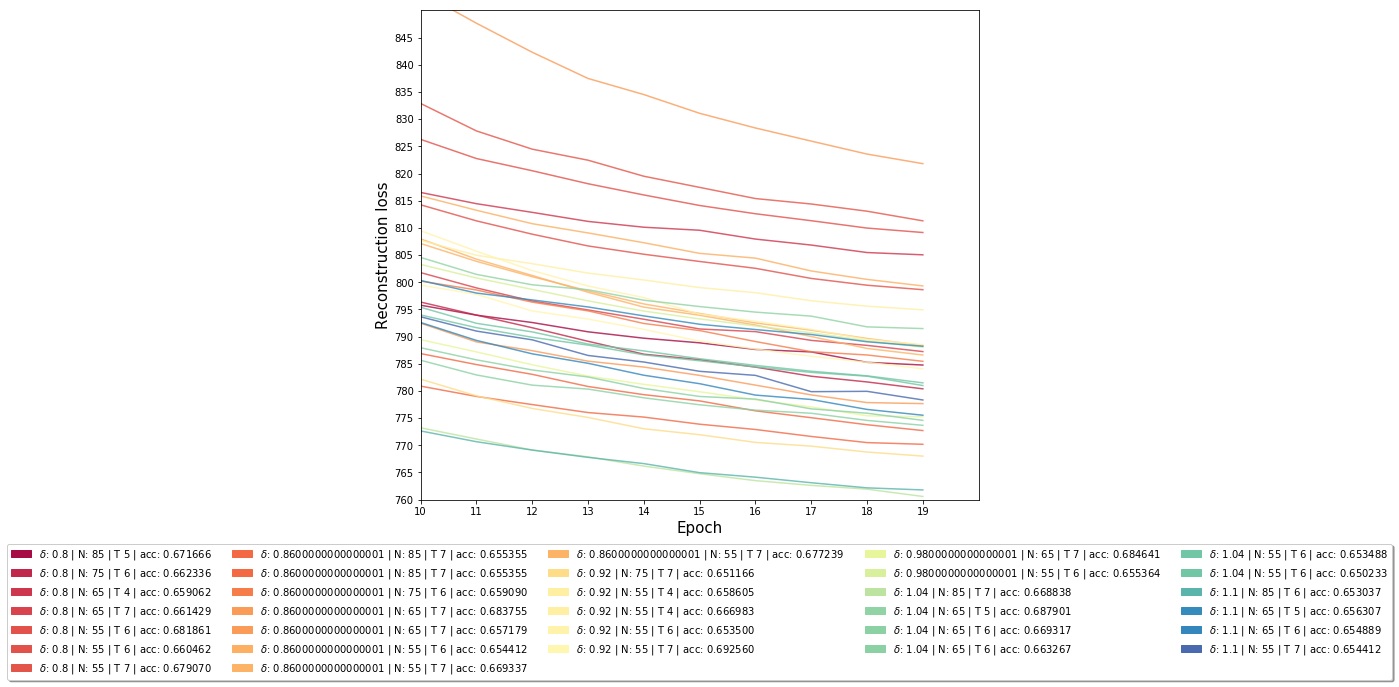

In [23]:
fig, ax = plt.subplots(figsize=(10, 9))
n_different = len(hyperparam_vals[0])*len(hyperparam_vals[1])*len(hyperparam_vals[2])
viridis = plt.cm.Spectral
colors = [viridis(i) for i in np.linspace(0, 0.95, n_different)]

z = 0
patches = []

for i, delta in enumerate(hyperparam_vals[0]):
    for j, N in enumerate(hyperparam_vals[1]):
        for k, T in enumerate(hyperparam_vals[2]):
            
            color = colors[z]
            for l in range(hyperparam_vals[3]):
                plotting = False
                track = loss_values[i, j, k, l][0]
                lr_acc = clf_acc[i, j, k, l][0]
            
                if lr_acc>0.65:
                    plotting=True
                    ax.plot(np.arange(hyperparam_vals[-1]), track, alpha=0.8, color=color)

                if plotting:
                    patches.append(mpatches.Patch(
                                                color=color,
                                                label=r"$\delta$: {} | N: {} | T {} | acc: {:2f}".format(
                                                                                            delta,
                                                                                            N,
                                                                                            T,
                                                                                            lr_acc
                                                                                            )
                                                )
                                    )
            z += 1

#plt.legend(handles=patches)

ax.set_ylim((760, 850))
ax.set_yticks(np.arange(760, 850, 5))

ax.set_xlim((10, 20))
ax.set_xticks(np.arange(10, 20))

ax.set_xlabel("Epoch", fontsize=15)
ax.set_ylabel("Reconstruction loss", fontsize=15)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=5)


ValueError: x and y must have same first dimension, but have shapes (40,) and (250,)

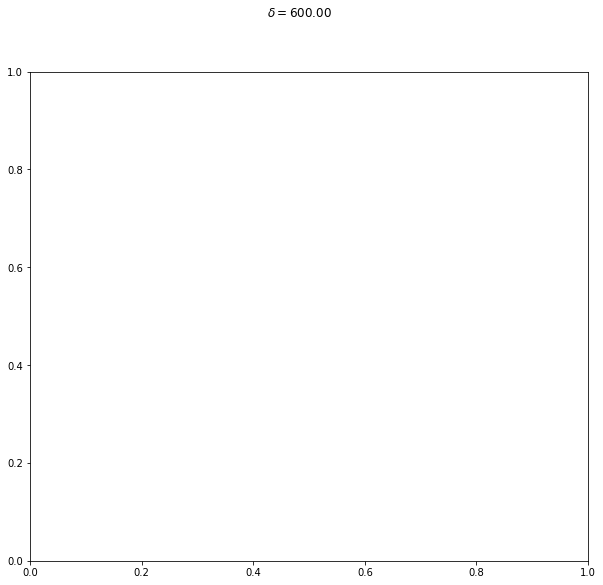

In [7]:
fig, ax = plt.subplots(figsize=(10, 9))

delta_loc = 0
delta_val = hyperparam_vals[0][delta_loc]

fig.suptitle(r"$\delta = {:4.2f}$".format(delta_val))
ax.plot(np.arange(40), loss_values[delta_loc, -1, 0, 0, :], "r-", linewidth=2, alpha = .4, 
        label = "N = {}".format(hyperparam_vals[1][-1])
       )
ax.plot(np.arange(40), loss_values[delta_loc, -2, 0, 0, :], "g-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-2])
       )
ax.plot(np.arange(40), loss_values[delta_loc, -3, 0, 0, :], "b-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-3])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -4, 0, 0, :], "c-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-4])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -5, 0, 0, :], "m-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-5])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -6, 0, 0, :], "y-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-6])
    )

ax.set_yscale("log")

plt.legend()
ax.set_yticks([100, 220, 230, 240, 250, 260, 300, 350, 500, 1000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()

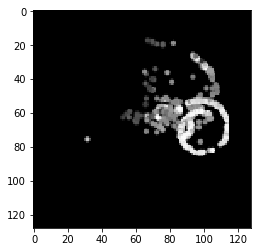

In [40]:
selected = images[2].reshape((1, 128, 128)).copy()
#selected = simulated[3].reshape((1, 128, 128))
#selected[selected < 0.3] = 0

plt.imshow(selected.reshape((128, 128)), cmap="Greys_r")

80 80 0.2 0.8 1


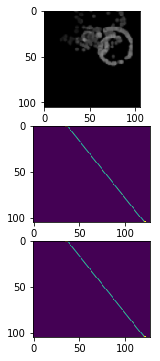

In [47]:
sigma_sq = 0.2
gamma = 1

gx = 80
gy = 80

delta = 0.8
N = 105

H = 128
W = 128
#gx, gy, sigma_sq, delta, gamma = attn_params(gx, gy, logsigma, delta, loggamma, N)

print(gx, gy, sigma_sq, delta, gamma)
Fx, Fy = filters(gx, gy, sigma_sq, delta, gamma, N) 

#eq 27  Fy x Fx T

#read op 
Fx_t = np.transpose(Fx, axes=[0, 2, 1])
tmp = np.einsum("ijk, ikn -> ijn", selected, Fx_t)
out = np.einsum("ijk, ikn -> ijn", Fy, tmp)

fig, axs = plt.subplots(nrows = 3, figsize = (10, 6))

axs[2].imshow(Fx.reshape((N, H)))
axs[1].imshow(Fy.reshape((N, H)))
axs[0].imshow(gamma*out.reshape((N, N)), cmap="Greys_r")

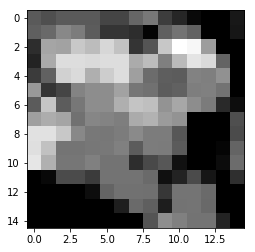

In [29]:
view = (60, 80)
plt.imshow(selected[0, 55:70, 75:90].reshape((15, 15)), cmap="Greys_r")